In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
file_path = './data/frauen_bundesliga_player_injury_history.csv'
df = pd.read_csv(file_path)

In [3]:
print(df.head())

           Player Name          Team Name  Age   Height Position      Value  \
0  1 Maria Luisa Grohs  FC Bayern München   23     1,80      Tor  125.000 €   
1  1 Maria Luisa Grohs  FC Bayern München   23     1,80      Tor  125.000 €   
2    32 Ena Mahmutovic  FC Bayern München   21     1,77      Tor   90.000 €   
3     41 Anna Wellmann  FC Bayern München   29     1,75      Tor   20.000 €   
4     1 Juliane Schmid  FC Bayern München   20  Unknown      Tor  unbekannt   

  Saison         von         bis          Verletzung  \
0  24/25  16.11.2024         NaN               Tumor   
1  24/25  21.10.2024  07.11.2024           Operation   
2  24/25  09.08.2024  12.09.2024       Fußverletzung   
3  24/25  09.08.2024  11.08.2024  muskuläre Probleme   
4  00/00  00.00.0000  00.00.0000      No injury info   

                                          Player URL  
0  https://www.soccerdonna.de/de/maria-luisa-groh...  
1  https://www.soccerdonna.de/de/maria-luisa-groh...  
2  https://www.soccerdo

## Data Cleaning

In [4]:
import numpy as np

if 'Height' in df.columns:
    df['Height'] = df['Height'].astype(str).str.replace(',', '.').replace('Unknown', np.nan)
    df['Height'] = pd.to_numeric(df['Height'], errors='coerce')  
    
if 'Value' in df.columns:
    df['Value'] = df['Value'].str.replace('€', '').str.replace('.', '').str.strip()
    df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

df = df.drop(df.columns[-1], axis=1)

print(df.head())

           Player Name          Team Name  Age  Height Position     Value  \
0  1 Maria Luisa Grohs  FC Bayern München   23    1.80      Tor  125000.0   
1  1 Maria Luisa Grohs  FC Bayern München   23    1.80      Tor  125000.0   
2    32 Ena Mahmutovic  FC Bayern München   21    1.77      Tor   90000.0   
3     41 Anna Wellmann  FC Bayern München   29    1.75      Tor   20000.0   
4     1 Juliane Schmid  FC Bayern München   20     NaN      Tor       NaN   

  Saison         von         bis          Verletzung  
0  24/25  16.11.2024         NaN               Tumor  
1  24/25  21.10.2024  07.11.2024           Operation  
2  24/25  09.08.2024  12.09.2024       Fußverletzung  
3  24/25  09.08.2024  11.08.2024  muskuläre Probleme  
4  00/00  00.00.0000  00.00.0000      No injury info  


In [5]:
if 'von' in df.columns:
    df['von'] = pd.to_datetime(df['von'], errors='coerce', format='%d.%m.%Y')
if 'bis' in df.columns:
    df['bis'] = pd.to_datetime(df['bis'], errors='coerce', format='%d.%m.%Y')

if 'von' in df.columns and 'bis' in df.columns:
    df['Injury Duration'] = (df['bis'] - df['von']).dt.days

df['Injury Duration'] = df['Injury Duration'].fillna(0)

print(df.head(10))

                   Player Name          Team Name  Age  Height  \
0          1 Maria Luisa Grohs  FC Bayern München   23    1.80   
1          1 Maria Luisa Grohs  FC Bayern München   23    1.80   
2            32 Ena Mahmutovic  FC Bayern München   21    1.77   
3             41 Anna Wellmann  FC Bayern München   29    1.75   
4             1 Juliane Schmid  FC Bayern München   20     NaN   
5      22 Veronika Litzlfelder  FC Bayern München   18     NaN   
6             2 Linda Sembrant  FC Bayern München   37    1.75   
7             2 Linda Sembrant  FC Bayern München   37    1.75   
8  4 Glódís Perla Viggósdóttir  FC Bayern München   29    1.73   
9         5 Magdalena Eriksson  FC Bayern München   31    1.73   

                     Position     Value Saison        von        bis  \
0                         Tor  125000.0  24/25 2024-11-16        NaT   
1                         Tor  125000.0  24/25 2024-10-21 2024-11-07   
2                         Tor   90000.0  24/25 2024-08-09

## General Analysis

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\3166302753.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_total_value.index, y=team_total_value.values, palette="viridis")


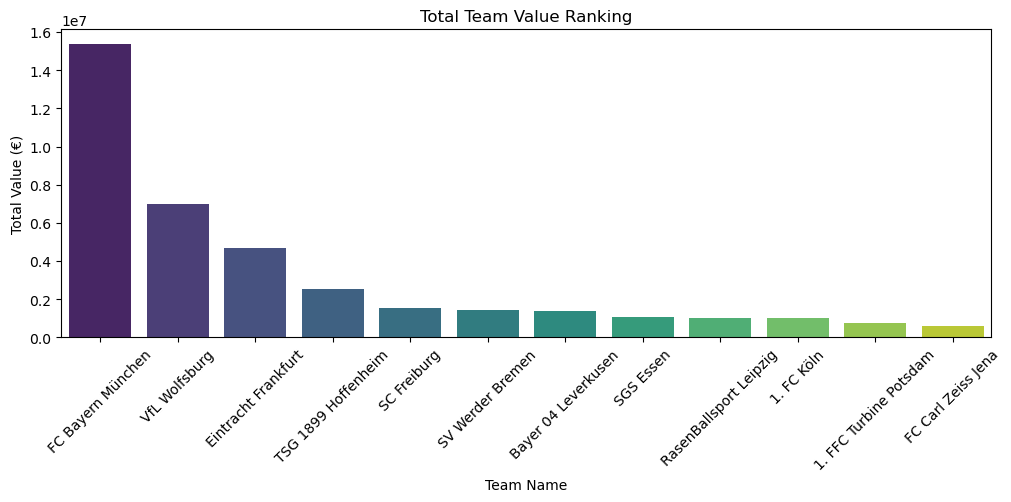

In [6]:
team_total_value = df.groupby('Team Name')['Value'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 4))
sns.barplot(x=team_total_value.index, y=team_total_value.values, palette="viridis")
plt.title("Total Team Value Ranking")
plt.xlabel("Team Name")
plt.ylabel("Total Value (€)")
plt.xticks(rotation=45)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\4148200243.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_players, x='Player Name', y='Value', palette="coolwarm")


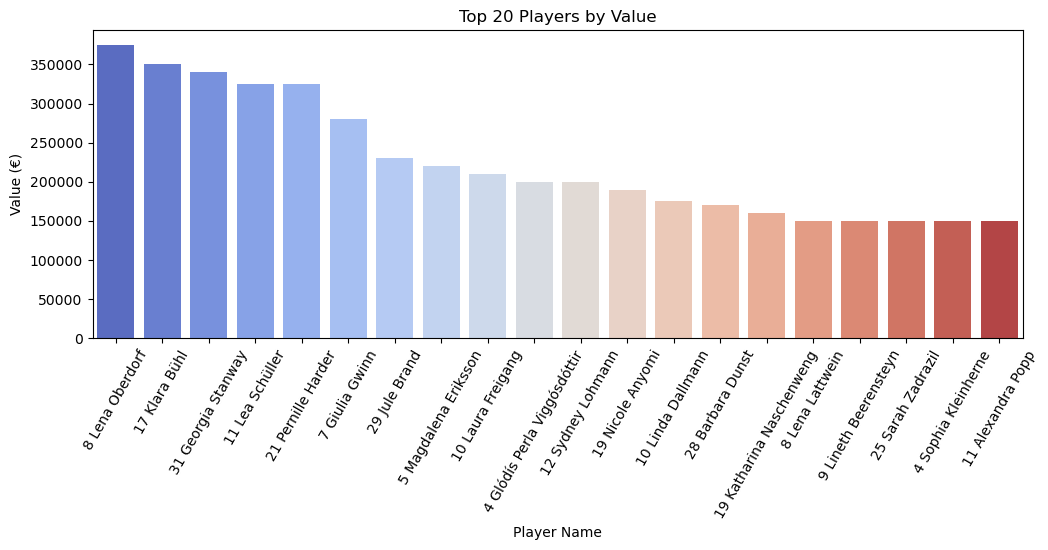

In [7]:
top_20_players = df[['Player Name', 'Value']].drop_duplicates().sort_values(by='Value', ascending=False).head(20)

plt.figure(figsize=(12, 4))
sns.barplot(data=top_20_players, x='Player Name', y='Value', palette="coolwarm")
plt.title("Top 20 Players by Value")
plt.xlabel("Player Name")
plt.ylabel("Value (€)")
plt.xticks(rotation=60)
plt.show()

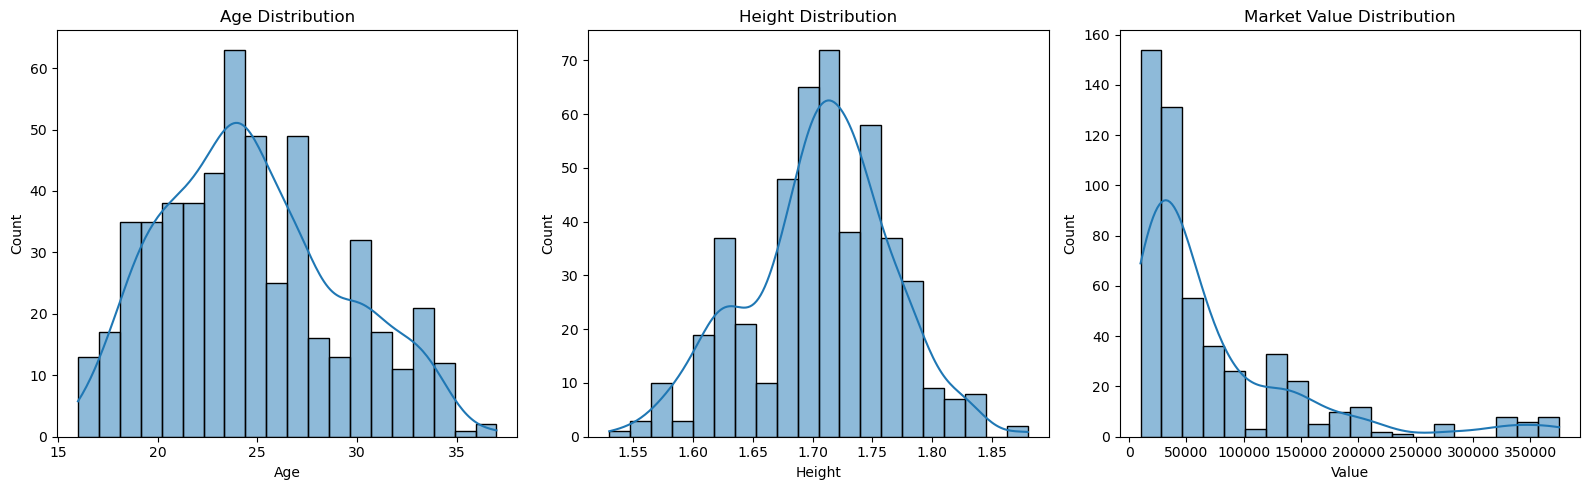

In [8]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Height'], kde=True, bins=20)
plt.title('Height Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Value'], kde=True, bins=20)
plt.title('Market Value Distribution')

plt.tight_layout()
plt.show()

## Player Value by Age

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\3252867794.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_values.index, y=age_values.values, palette="coolwarm")


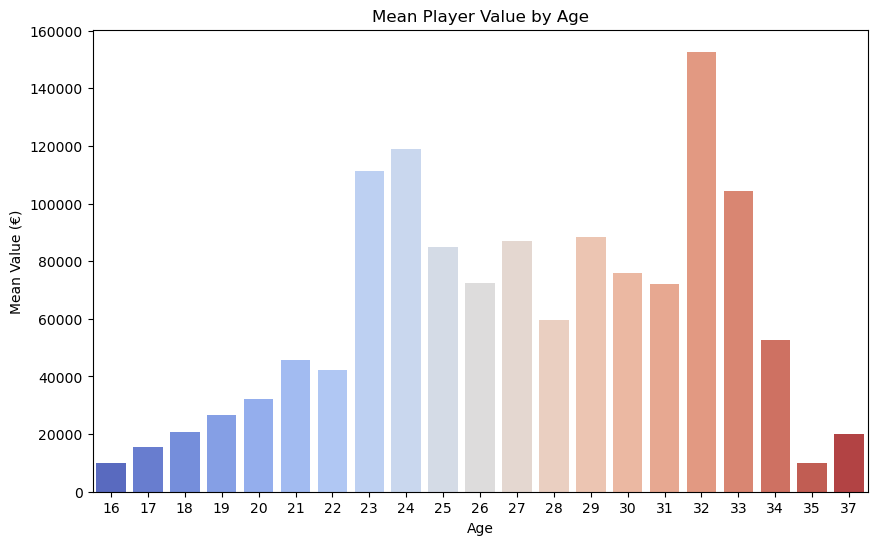

In [9]:
# # 定义年龄段分组
# age_bins = [15, 18, 21, 24, 27, 30, 33, 36, 40]
# age_labels = ['15-17', '18-19', '20-22', '23-25', '26-28', '29-31', '32-35', '36-40']
# df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)

# 计算每个年龄段的球员价值中位数
# age_group_values = df.groupby('Age Group')['Value'].mean()
age_values = df.groupby('Age')['Value'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_values.index, y=age_values.values, palette="coolwarm")
plt.title("Mean Player Value by Age")
plt.xlabel("Age")
plt.ylabel("Mean Value (€)")
plt.show()


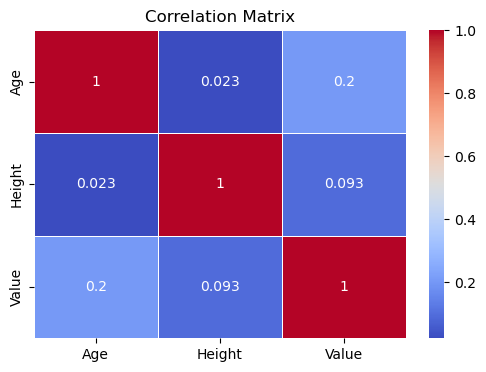

In [10]:
correlation_matrix = df[['Age', 'Height', 'Value']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Injury Distribution by Type

In [11]:
filtered_df = df[df['Injury Duration'] != 0]

Injury Distribution:
Verletzung
Kreuzbandriss              41
Corona-Virus               25
muskuläre Probleme         21
unbekannte Verletzung      21
Knieverletzung             17
Knieprobleme               13
Sprunggelenksverletzung    12
krank                      11
Schulterverletzung         11
Fußverletzung              10
Muskelverletzung            8
Syndesmosebandriss          7
Muskelfaserriss             7
Erkältung                   6
Rückenprobleme              6
Knie-OP                     5
Oberschenkelverletzung      5
Mittelfußbruch              5
grippaler Infekt            4
Meniskusverletzung          4
Name: count, dtype: int64


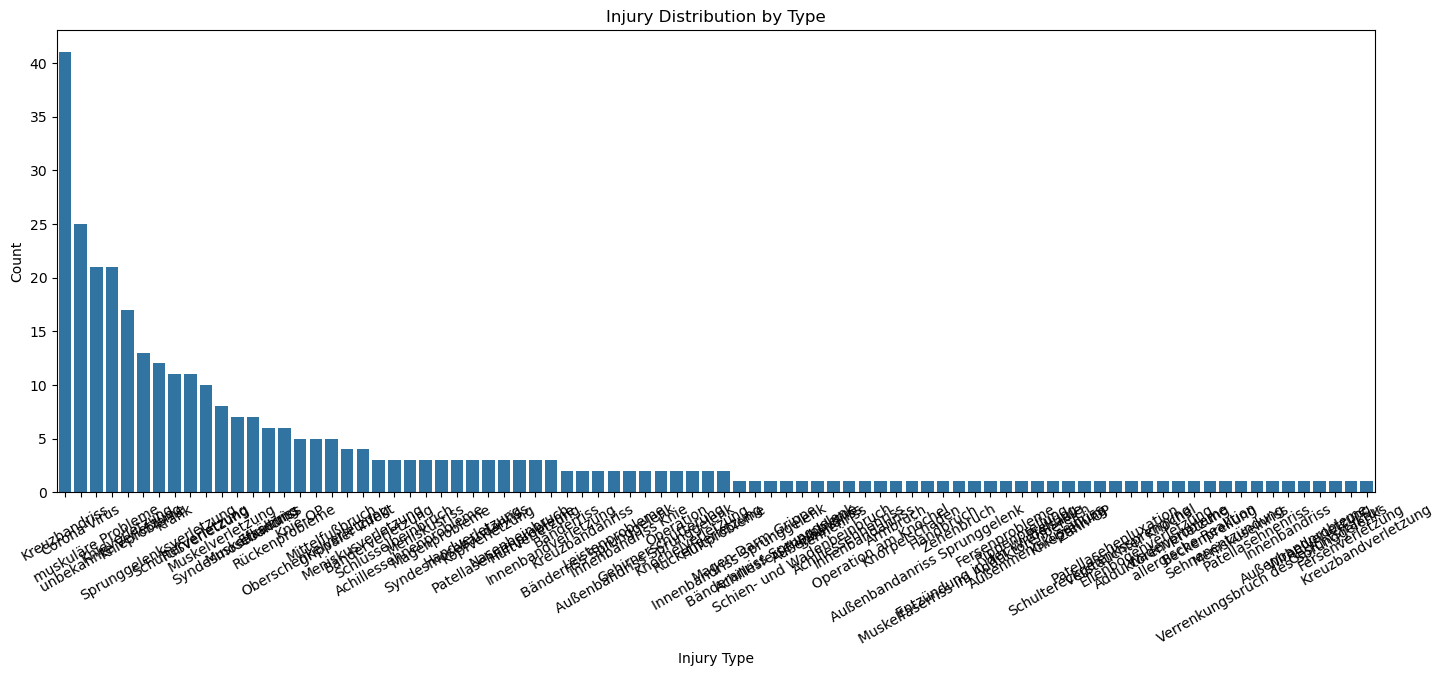

In [12]:
injury_distribution = filtered_df['Verletzung'].value_counts()
print("Injury Distribution:")
print(injury_distribution.head(20))

plt.figure(figsize=(17, 6))
sns.barplot(x=injury_distribution.index, y=injury_distribution.values)
plt.title("Injury Distribution by Type")
plt.xticks(rotation=30)
plt.xlabel("Injury Type")
plt.ylabel("Count")
plt.show()

*The data has the problem of the same injury being stated in different ways in terms of injury types, which still needs further processing.*

Knee-related injuries (Kreuzbandriss, Knieverletzung, Knieprobleme), take up several spots in the top ten

Especially reuzbandriss (ACL), which is far ahead of the second place Corona-Virus in the number of recorded injuries.

## Injury Duration of Top 20 Injury Types

Average Injury Duration for Top 20 Injury Types:
Verletzung
Corona-Virus                10.760000
Erkältung                    9.166667
Fußverletzung               62.700000
Knie-OP                    125.800000
Knieprobleme                67.076923
Knieverletzung             160.823529
Kreuzbandriss              273.439024
Meniskusverletzung          89.750000
Mittelfußbruch             111.000000
Muskelfaserriss             45.428571
Muskelverletzung            60.625000
Oberschenkelverletzung      70.400000
Rückenprobleme              28.166667
Schulterverletzung          69.454545
Sprunggelenksverletzung     72.833333
Syndesmosebandriss         122.571429
grippaler Infekt             8.000000
krank                       21.545455
muskuläre Probleme          22.190476
unbekannte Verletzung       46.523810
Name: Injury Duration, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\1370453040.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_injury_duration_top_20.index, y=avg_injury_duration_top_20.values, palette="magma")


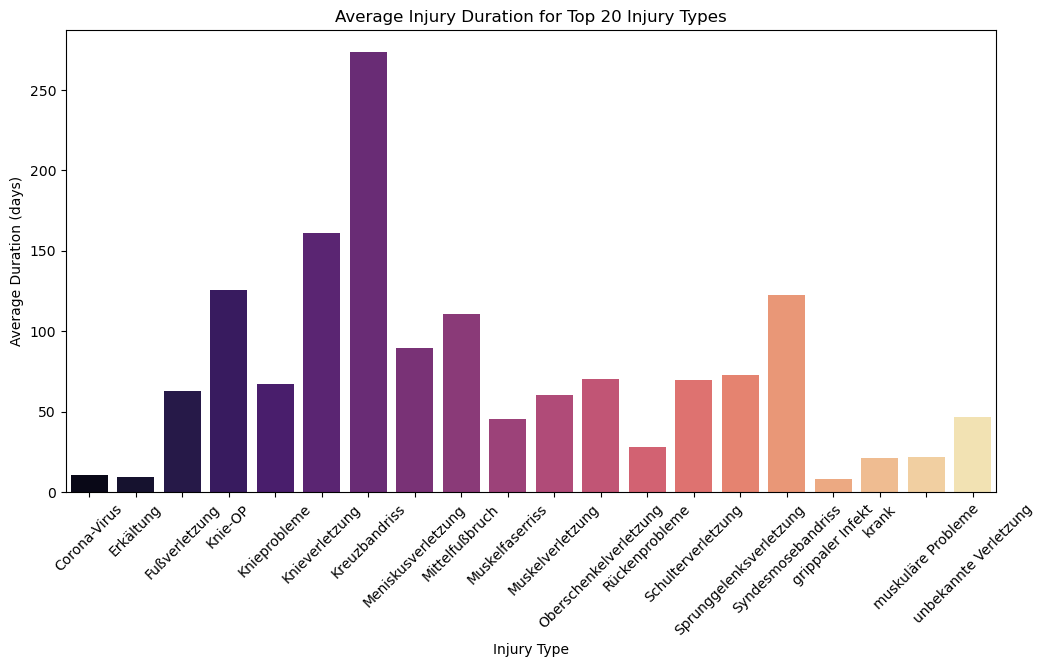

In [13]:
# 获取前 20 种伤病种类
top_20_injuries = injury_distribution.head(20).index

# 过滤 DataFrame，仅保留前 20 种伤病
top_20_filtered_df = filtered_df[filtered_df['Verletzung'].isin(top_20_injuries)]

# 计算每种伤病类型的平均持续时间
avg_injury_duration_top_20 = top_20_filtered_df.groupby('Verletzung')['Injury Duration'].mean()

print("Average Injury Duration for Top 20 Injury Types:")
print(avg_injury_duration_top_20)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_injury_duration_top_20.index, y=avg_injury_duration_top_20.values, palette="magma")
plt.title("Average Injury Duration for Top 20 Injury Types")
plt.xticks(rotation=45)
plt.xlabel("Injury Type")
plt.ylabel("Average Duration (days)")
plt.show()


Knie

## Injury on Record by Team

Injuries by Team:
Team Name
FC Bayern München         74
VfL Wolfsburg             66
Eintracht Frankfurt       38
TSG 1899 Hoffenheim       36
SC Freiburg               22
SV Werder Bremen          22
1. FC Köln                18
1. FFC Turbine Potsdam    17
SGS Essen                 14
Bayer 04 Leverkusen       12
RasenBallsport Leipzig    12
FC Carl Zeiss Jena         7
Name: count, dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\2677685089.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_injuries.index, y=team_injuries.values, palette="cubehelix")


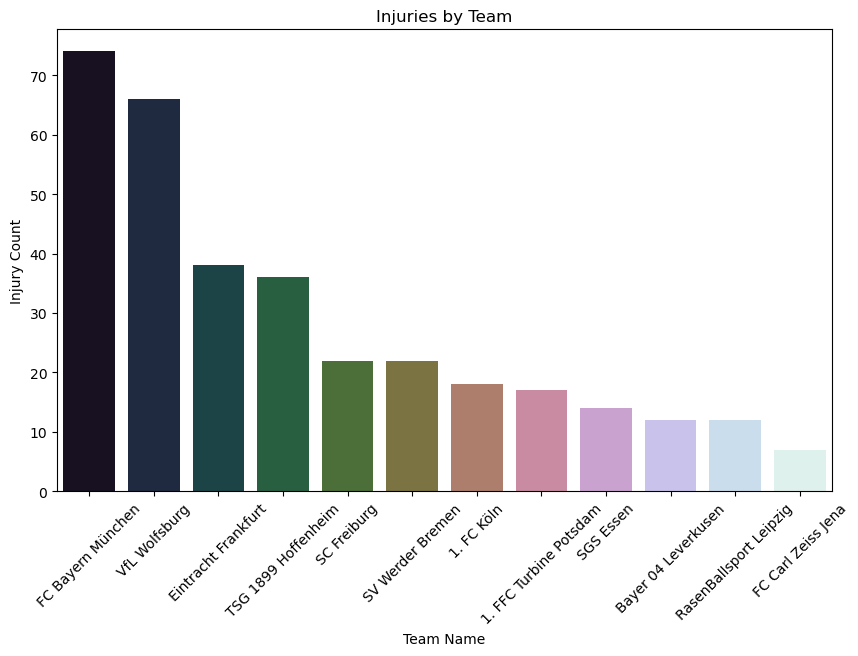

In [14]:
# 统计每支球队有记录的伤病数量
team_injuries = filtered_df['Team Name'].value_counts()

print("Injuries by Team:")
print(team_injuries)

plt.figure(figsize=(10, 6))
sns.barplot(x=team_injuries.index, y=team_injuries.values, palette="cubehelix")
plt.title("Injuries by Team")
plt.xticks(rotation=45)
plt.xlabel("Team Name")
plt.ylabel("Injury Count")
plt.show()


Can't analyze which team has more injuries in this way

Big teams like Bayern have more comprehensive data while smaller teams like Jena have fewer documented injuries

## Injury Distribution by Age

Age
18     6
19    10
20    16
21    16
22    20
23    26
24    52
25    33
26    16
27    35
28    12
29     9
30    29
31    15
32    10
33    20
34    11
37     2
Name: count, dtype: int64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\2158543086.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_injury_distribution.index, y=age_injury_distribution.values, palette="coolwarm")


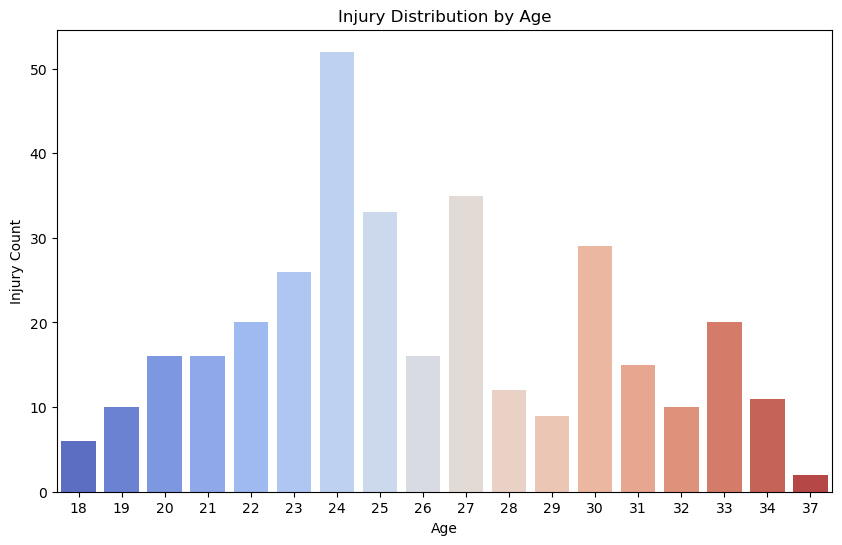

In [15]:
# 统计每个年龄的伤病数量
age_injury_distribution = filtered_df['Age'].value_counts().sort_index()

display(age_injury_distribution)

plt.figure(figsize=(10, 6))
sns.barplot(x=age_injury_distribution.index, y=age_injury_distribution.values, palette="coolwarm")
plt.title("Injury Distribution by Age")
plt.xlabel("Age")
plt.ylabel("Injury Count")
plt.show()


## Injury Distribution by Player

Player Injury Counts (Excluding 'No injury info'):


Player Name
11 Alexandra Popp                  11
31 Marina Hegering                 10
9 Jovana Damnjanović                9
33 Fabienne Dongus                  7
8 Lena Oberdorf                     7
                                   ..
7 Cornelia Kramer                   1
18 Karólína Lea Vilhjálmsdóttir     1
32 Ena Mahmutovic                   1
6 Katharina Piljić                  1
18 Anna Margraf                     1
Name: count, Length: 168, dtype: int64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\1636024438.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_player_injury_counts.index, y=top_20_player_injury_counts.values, palette="Blues_r")


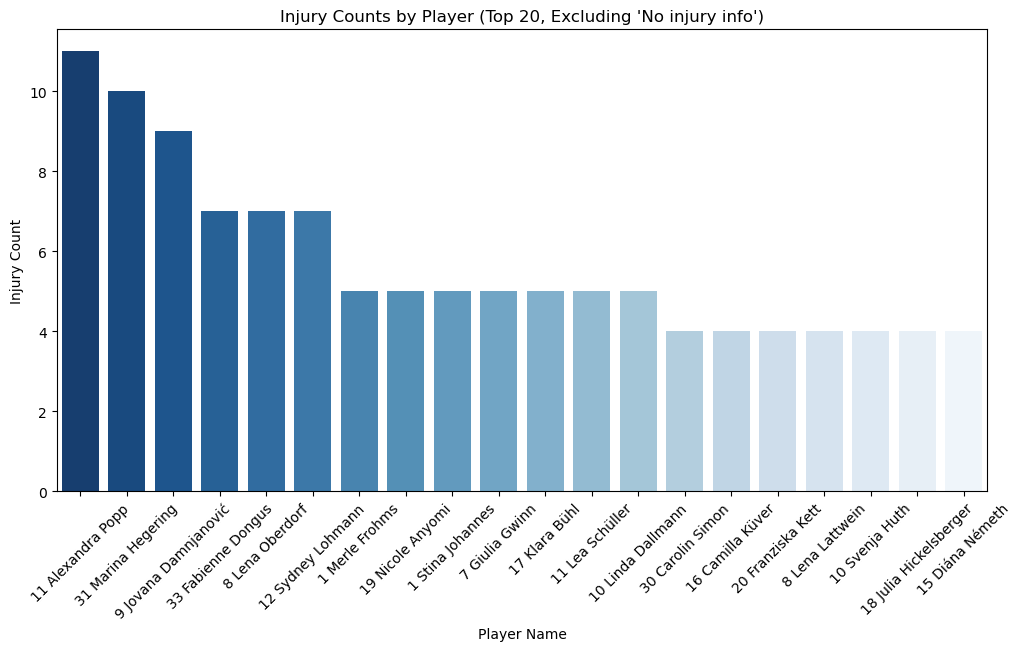

In [16]:
# 每个球员的伤病次数（排除 'No injury info'）
player_injury_counts = filtered_df['Player Name'].value_counts()

print("Player Injury Counts (Excluding 'No injury info'):")
display(player_injury_counts)

# 获取前 20 位球员
top_20_player_injury_counts = player_injury_counts.head(20).index

# 过滤数据，仅保留前 20 位球员
top_20_filtered_df = filtered_df[filtered_df['Player Name'].isin(top_20_player_injury_counts)]

# 再次统计每个球员的伤病次数
top_20_player_injury_counts = top_20_filtered_df['Player Name'].value_counts()

# 绘制柱状图
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_player_injury_counts.index, y=top_20_player_injury_counts.values, palette="Blues_r")
plt.title("Injury Counts by Player (Top 20, Excluding 'No injury info')")
plt.xticks(rotation=45)
plt.xlabel("Player Name")
plt.ylabel("Injury Count")
plt.show()


Famous players and older players?

,Injury Count,Value
Player Name,,
11 Alexandra Popp,11,150000.0
31 Marina Hegering,10,60000.0
9 Jovana Damnjanović,9,90000.0
33 Fabienne Dongus,7,40000.0
8 Lena Oberdorf,7,375000.0
...,...,...
7 Cornelia Kramer,1,125000.0
18 Karólína Lea Vilhjálmsdóttir,1,125000.0
32 Ena Mahmutovic,1,90000.0


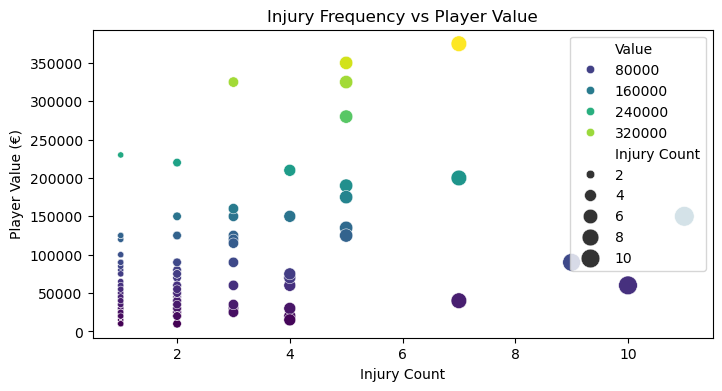

In [17]:
# 统计每个球员的伤病次数
player_injury_counts = filtered_df['Player Name'].value_counts().rename('Injury Count').to_frame()

# 获取每个球员的价值
player_values = df[['Player Name', 'Value']].drop_duplicates().set_index('Player Name')

# 合并伤病次数和价值数据
injury_value_df = player_injury_counts.join(player_values, how='inner').dropna()

display(injury_value_df)

plt.figure(figsize=(8, 4))
sns.scatterplot(data=injury_value_df, x='Injury Count', y='Value', hue='Value', palette="viridis", size='Injury Count', sizes=(20, 200))
plt.title("Injury Frequency vs Player Value")
plt.xlabel("Injury Count")
plt.ylabel("Player Value (€)")
plt.show()



                        Injury Count  Age
Player Name                              
11 Alexandra Popp                 11   33
31 Marina Hegering                10   34
9 Jovana Damnjanović               9   30
33 Fabienne Dongus                 7   30
8 Lena Oberdorf                    7   23
12 Sydney Lohmann                  7   24
19 Nicole Anyomi                   5   24
7 Giulia Gwinn                     5   25
1 Merle Frohms                     5   29
1 Stina Johannes                   5   24
10 Linda Dallmann                  5   30
17 Klara Bühl                      5   24
11 Lea Schüller                    5   27
18 Julia Hickelsberger             4   25
15 Diána Németh                    4   20


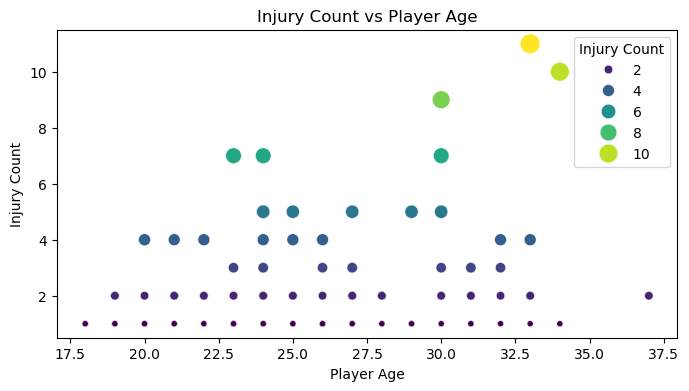

In [18]:
# 获取球员年龄（确保球员记录唯一）
player_ages = df[['Player Name', 'Age']].drop_duplicates().set_index('Player Name')

# 合并伤病次数和年龄数据
injury_age_df = player_injury_counts.join(player_ages, how='inner').dropna()

print(injury_age_df.head(15))

plt.figure(figsize=(8, 4))
sns.scatterplot(data=injury_age_df, x='Age', y='Injury Count', hue='Injury Count', palette="viridis", size='Injury Count', sizes=(20, 200))
plt.title("Injury Count vs Player Age")
plt.xlabel("Player Age")
plt.ylabel("Injury Count")
plt.show()


## Injury by Position

Position
Angriff                               66
Abwehr - Innenverteidigung            50
Tor                                   38
Mittelfeld - offensives Mittelfeld    32
Mittelfeld - defensives Mittelfeld    30
Mittelfeld - zentrales Mittelfeld     21
Angriff - Mittelstürmerin             20
Abwehr - linke Verteidigung           19
Mittelfeld                            17
Abwehr - rechte Verteidigung          16
Angriff - Linksaußen                  11
Abwehr                                 9
Mittelfeld - rechtes Mittelfeld        5
Angriff - Rechtsaußen                  2
Abwehr - rechtes Mittelfeld            1
Mittelfeld - linkes Mittelfeld         1
Name: count, dtype: int64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\2387806872.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_injuries.index, y=position_injuries.values, palette="magma")


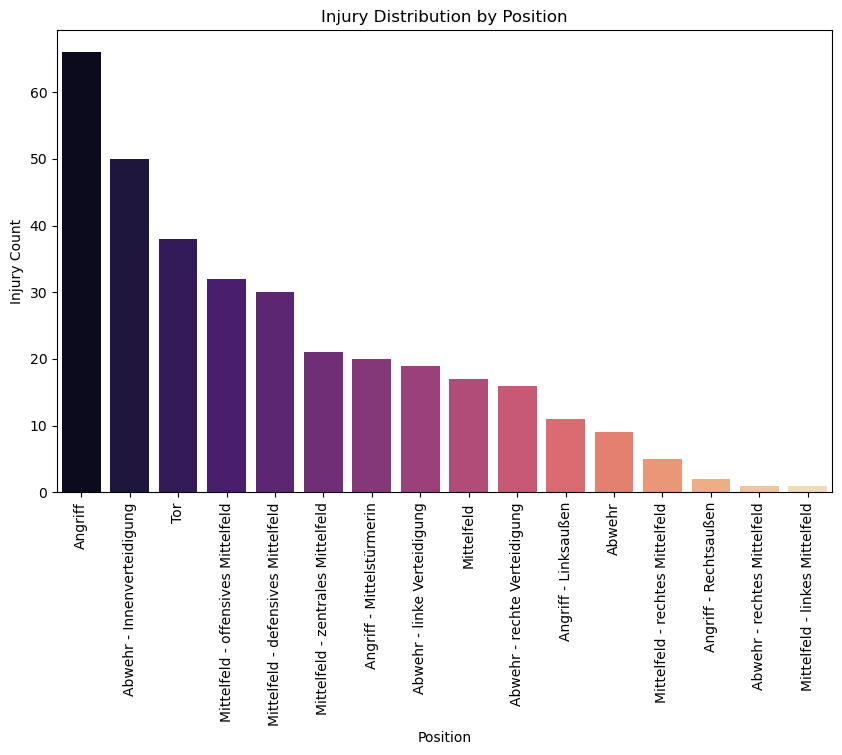

In [19]:
# 统计不同位置的伤病数量
position_injuries = filtered_df['Position'].value_counts()

display(position_injuries)

plt.figure(figsize=(10, 6))
sns.barplot(x=position_injuries.index, y=position_injuries.values, palette="magma")
plt.title("Injury Distribution by Position")
plt.xticks(rotation=90)
plt.xlabel("Position")
plt.ylabel("Injury Count")
plt.show()


In [20]:
# print(df.head())

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2512\4177699511.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Position Grouped'] = filtered_df['Position'].map(position_mapping)


,Unique Players,Total Injuries
Position Grouped,,
Abwehr,102,95
Angriff,78,99
Mittelfeld,108,106
Tor,44,38


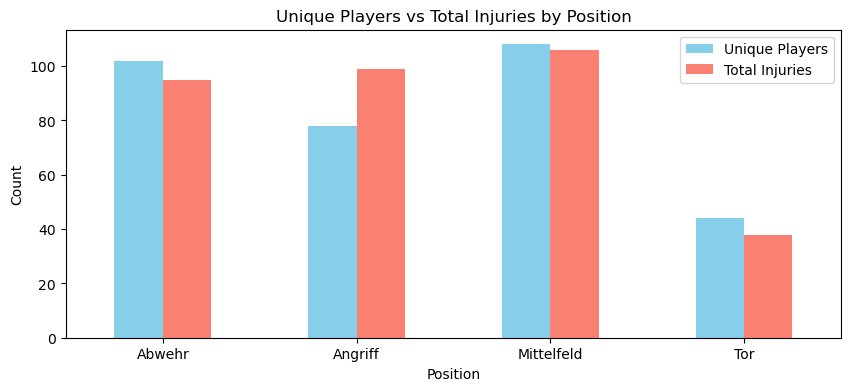

In [21]:
# 创建一个映射，将所有细分分类归类到主要分类
position_mapping = {
    'Angriff': 'Angriff',
    'Angriff - Mittelstürmerin': 'Angriff',
    'Angriff - Linksaußen': 'Angriff',
    'Angriff - Rechtsaußen': 'Angriff',
    'Abwehr': 'Abwehr',
    'Abwehr - Innenverteidigung': 'Abwehr',
    'Abwehr - linke Verteidigung': 'Abwehr',
    'Abwehr - rechte Verteidigung': 'Abwehr',
    'Abwehr - rechtes Mittelfeld': 'Abwehr',
    'Mittelfeld': 'Mittelfeld',
    'Mittelfeld - offensives Mittelfeld': 'Mittelfeld',
    'Mittelfeld - defensives Mittelfeld': 'Mittelfeld',
    'Mittelfeld - zentrales Mittelfeld': 'Mittelfeld',
    'Mittelfeld - rechtes Mittelfeld': 'Mittelfeld',
    'Mittelfeld - linkes Mittelfeld': 'Mittelfeld',
    'Tor': 'Tor'
}

# df['Position Grouped'] = df['Position'].map(position_mapping)
# filtered_df['Position Grouped'] = filtered_df['Position'].map(position_mapping)
# position_grouped_counts = df['Position Grouped'].value_counts()
# injury_counts = filtered_df['Position Grouped'].value_counts()

# position_data = pd.DataFrame({
#         'Total Players': total_counts,
#         'Injured Players': injury_counts
#     }).fillna(0)

# display(position_grouped_counts)

# position_data.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
# plt.title("Total Players vs Injured Players by Position")
# plt.xlabel("Position")
# plt.ylabel("Count")
# plt.xticks(rotation=0)
# plt.legend(["Total Players", "Injured Players"])
# plt.show()


df['Position Grouped'] = df['Position'].map(position_mapping)
filtered_df['Position Grouped'] = filtered_df['Position'].map(position_mapping)

# 每个位置的球员数量（只统计唯一球员）
unique_players_per_position = df[['Player Name', 'Position Grouped']].drop_duplicates()['Position Grouped'].value_counts()

# 每个位置的总伤病条数
total_injuries_per_position = filtered_df['Position Grouped'].value_counts()

# 并球员数量和伤病条数数据
position_comparison = pd.DataFrame({
    'Unique Players': unique_players_per_position,
    'Total Injuries': total_injuries_per_position
}).fillna(0)  

display(position_comparison)

position_comparison.plot(kind='bar', figsize=(10, 4), color=['skyblue', 'salmon'])
plt.title("Unique Players vs Total Injuries by Position")
plt.xlabel("Position")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(["Unique Players", "Total Injuries"])
plt.show()


## Injury by Season

Injuries by Season:


Saison
11/12     1
12/13     1
13/14     5
14/15     1
15/16     3
16/17    19
17/18    11
18/19    11
19/20    11
20/21    24
21/22    47
22/23    74
23/24    90
24/25    40
Name: count, dtype: int64

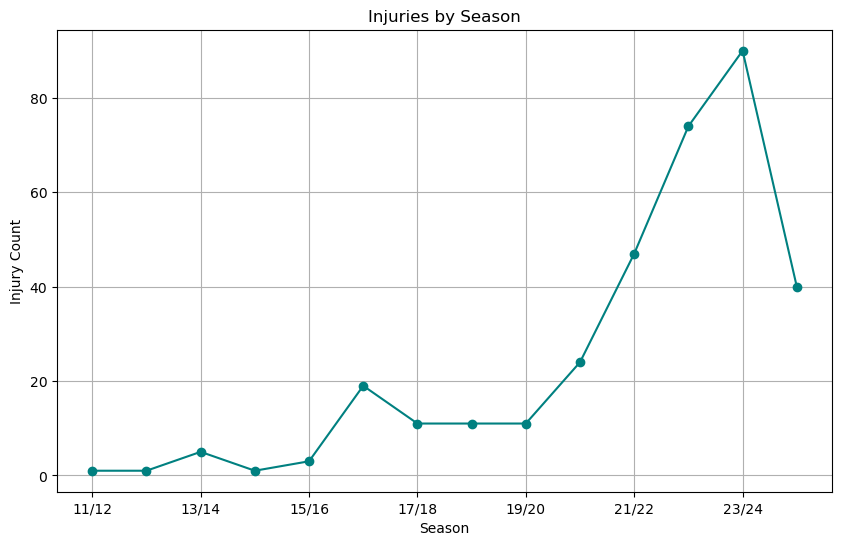

In [22]:
# 统计每个赛季的伤病数量
season_injuries = filtered_df['Saison'].value_counts().sort_index()

print("Injuries by Season:")
display(season_injuries)

plt.figure(figsize=(10, 6))
season_injuries.plot(kind='line', marker='o', color='teal')
plt.title("Injuries by Season")
plt.xlabel("Season")
plt.ylabel("Injury Count")
plt.grid()
plt.show()


24/25 Season only halfway